# Intermediate

## Task 02: Apply principal component analysis (PCA) to a corpus of medieval texts to identify stylistic clusters.

Use PCA to reduce the dimensionality of the data and visualize stylistic similarities and differences among the texts.This code applies Principal Component Analysis (PCA) to a corpus of medieval texts to analyze and visualize their stylistic variation. It uses word frequencies, sentence length, and the number of unique words as features. PCA helps reduce the dimensionality of these features, making it easier to visualize and identify patterns in the data.

Hints:
- Select relevant features for the analysis, such as word frequencies, sentence length, or part-of-speech distributions.
- Interpret the resulting PCA plot to identify clusters of texts with similar styles.


**Libraries:**

* **numpy:** For numerical operations.
* **pandas:** For data manipulation and analysis.
* **matplotlib.pyplot:** For data visualization.
* **sklearn:**
    * `CountVectorizer`: For extracting word frequency features.
    * `PCA`: For principal component analysis.
    * `StandardScaler`: For standardizing features.

**Code Walkthrough:**

1. **Data Loading and Feature Extraction:**
   * Load the sample medieval texts.
   * Use `CountVectorizer` to create a matrix of word frequencies.
   * Calculate sentence lengths and the number of unique words per text.
   * Combine all features into a single DataFrame.

2. **Feature Scaling and PCA:**
   * Standardize the features using `StandardScaler` to ensure they have zero mean and unit variance.
   * Apply PCA to reduce the feature space to two principal components (PC1 and PC2).
   * Create a DataFrame to store the PCA results.

3. **Visualization and Results:**
   * Create a scatter plot of the texts in the reduced PCA space.
   * Label each point in the plot with the corresponding text number.
   * Add plot title, labels, and legend.
   * Print the top 5 features that contribute most to each principal component (PC1 and PC2), providing insights into the stylistic factors driving the variation.

**Key Points:**

* **Stylometry:** This code demonstrates a basic approach to stylometry, the study of linguistic style.
* **Dimensionality Reduction:** PCA is used to reduce the dimensionality of the feature space, making it easier to visualize patterns.
* **Feature Engineering:** The code includes both word frequency features and additional features like sentence length and unique words, which can capture different aspects of style.
* **Interpretation:** The results help us understand the stylistic relationships between the texts and what linguistic features contribute most to the variation.

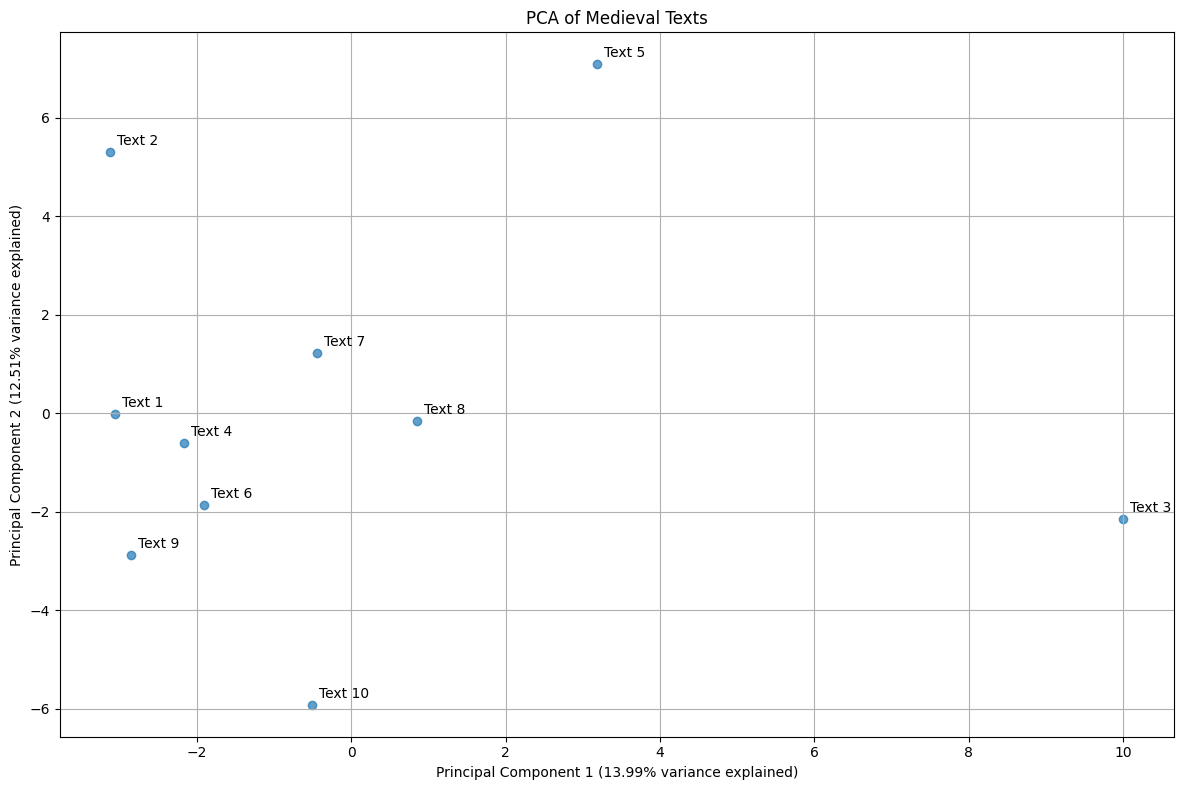


Top 5 features contributing to PC1:
dragon: 0.2270
fair: 0.2270
fearsome: 0.2270
for: 0.2270
gone: 0.2270

Top 5 features contributing to PC2:
of: 0.2085
brings: 0.1796
good: 0.1796
humble: 0.1796
our: 0.1796


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Some sample corpus of medieval texts. CHANGE IT
texts = [
    "Forsooth, the knight did venture forth with great valor and chivalry.",
    "In days of yore, when Arthur's court was filled with brave and noble souls,",
    "The fair maiden wept, for her true love had gone to battle the fearsome dragon.",
    "Hark! The minstrel's lute doth play a melody most sweet and melancholic.",
    "Pray tell, good sir, of the quest that brings thee to our humble village.",
    "The wise wizard spoke in riddles, his beard as long as his years.",
    "Lo, the castle stood tall upon the hill, a bastion of stone and strength.",
    "Anon, the jester's jest brought mirth to the gloomy halls of the keep.",
    "Verily, the blacksmith's hammer rang out, shaping steel into deadly blades.",
    "Alas, the plague swept through the land, leaving naught but sorrow in its wake."
]

# Feature extraction: word frequencies
"APPLY COUNTVECTORIZER"
word_freq = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Additional features: sentence length and number of unique words
sentence_length = [len(text.split()) for text in texts]
unique_words = [len(set(text.split())) for text in texts]

# Combine all features
features = pd.concat([word_freq,
                      pd.DataFrame({'sentence_length': sentence_length,
                                    'unique_words': unique_words})], axis=1)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Visualize the PCA results
plt.figure(figsize=(12, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)

# Add text labels for each point
for i, txt in enumerate(texts):
    plt.annotate(f"Text {i+1}", (pca_df['PC1'][i], pca_df['PC2'][i]),
                 xytext=(5, 5), textcoords='offset points')

plt.title('PCA of Medieval Texts')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} variance explained)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} variance explained)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the top contributing features for each principal component
feature_names = list(features.columns)
for i, pc in enumerate(['PC1', 'PC2']):
    top_features = sorted(zip(pca.components_[i], feature_names), key=lambda x: abs(x[0]), reverse=True)[:5]
    print(f"\nTop 5 features contributing to {pc}:")
    for coef, feature in top_features:
        print(f"{feature}: {coef:.4f}")

## Solution

1:
```
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
```
